## *Team 14 Final Project Report*

Members: Jared Maynard-Weicherding

Class: INST447, Section: 0101

#### *Project Proposal Submission Information*

- What is the specific project goal that you are going to focus on and why is it important?
    - We are writing about parking tickets and violations and we are going to look at places in DC where these are most prevalent. This is important because we can potentially find places where violations are much more enforced which could make it easier for users to avoid tickets.
- Where will you get the data?
    - We got our parking enforcement and abandoned vehicles data from opendata.dc.gov
    - Parking Enforcement:
        - https://opendata.dc.gov/datasets/DCGIS::parking-enforcement-in-the-last-30-days/explore?location=38.894734%2C-77.019147%2C13.00&showTable=true
    - Abandoned Vehicles:
        - https://opendata.dc.gov/datasets/abandoned-vehicle-in-last-30-days/explore?location=38.894712%2C-77.019147%2C12.90&showTable=true
    - The parking enforcement data and the abandoned vehicles data includes: servicecode, servicecodedesdcription, servicetypecoddescription, organizationacronym, servicecallcount, adddate, resolutiondate, serviceduedata, serviceorderdate, inspectiondate, serviceorderstatus, servicerequestID, priority, streetaddress, xcoord, ycoord, latitude, longitude, city, state, zipcode, maraddressrepositoryID, ward, created, edited
    - To address and solve the problem, we will use the following sections: servicecode, servicecodedescription, serviceorderdata, streetaddress, xcoord, ycoord, city, state, zipcode
- What data processing steps will you need to undergo to extract results? Be as detailed as possible.
    - Since the data seems to be somewhat cleaned already, we can see if we can further clean it.
        - Example 1: the time and date is together for the adddate and resolutiondate, and serviceduedate where we can separate the actual date and time.
        - Example 2: Changing the variables to camelcase so it's a little bit more legible when reading our code.
        - Example 3: Removing columns that might not be necessary, like the column for what organization is the one putting this information in.
            - All inputs are from the Department of Public Works (DC DPW), so it is redundant unless there are other organizations contributing to this data.
    - Since there are both GeoJSON files for both datasets, we were thinking of using those as well if it serves us.
    - There are also API for these datasets but we are not sure on how to exactly use them at the time being.
        - Possibly using Postman with these APIs provided.


#### *Feedback from Professor Heidenblad for Project Proposal*

April 23rd, 2023 - "This project should end up with some interesting results. Working with the GeoJSON would definitely be an opportunity to increase the complexity. The opendata API may be worth exploring, but it would depend on what you want to do with it."

### *Details for Final Project Report*

Your final project report should take the form of a report which describes the data, the goal of your project, your analytic steps, your findings, limitations, and take away message. As a guideline, I suggest including the following sections, although choose the sections that make most sense for your project.

- Introduction (several paragraphs)
    - Explains data (source, variables, collection method, etc), goal, and motivation for goal.
- Method (length will depend on your project)
    - Explains in detail the cleaning, preprocessing steps, and analytic steps you took.
        - Should be detailed enough that someone else could replicate your work.
- Preprocessing (length will depend on your project)
    - Cleans and manipulates data into the right format for analysis.
- Results (length will depend on your project)
    - Summarizes and visualizes the data as appropriate to address your goal.
        - May be broken down into subsections if that makes sense.
- Discussion (several paragraphs)
    - What are the implications of your findings with respect to your goal?
- Limitations (a couple of paragraphs)
    - What are the limitations of the data set and your analyses?
- Conclusion (a couple sentences)
    - What is the final take away from your work?

Your report should be created using Jupyter Notebook and should include processing steps as code sections. You should turn in the html file(s), the source code (ipynb), raw data, and clean data. If your analysis required lots of cleaning or preprocessing, you can include the code to perform these actions in a separate Jupyter Notebook (or other code files). However, you should turn in all code.

Link to GitHub repository: https://github.com/MarioVA1/INST447FinalProject

In [2]:
# Installing libraries for working with data

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import geopandas as gpd # module required to use geoJSON 

In [3]:
# Currently all columns are not displayed while calling .head() on the two DataFrames. This will allow us to see all columns.

pd.set_option('display.max_columns', None)

In [4]:
abandoned_df = pd.read_csv('Abandoned_Vehicle_in_Last_30_Days.csv')
abandoned_df.head()

,X,Y,OBJECTID,SERVICECODE,SERVICECODEDESCRIPTION,SERVICETYPECODEDESCRIPTION,ORGANIZATIONACRONYM,SERVICECALLCOUNT,ADDDATE,RESOLUTIONDATE,SERVICEDUEDATE,SERVICEORDERDATE,INSPECTIONFLAG,INSPECTIONDATE,INSPECTORNAME,SERVICEORDERSTATUS,STATUS_CODE,SERVICEREQUESTID,PRIORITY,STREETADDRESS,XCOORD,YCOORD,LATITUDE,LONGITUDE,CITY,STATE,ZIPCODE,MARADDRESSREPOSITORYID,WARD,DETAILS,GIS_ID,GLOBALID,CREATOR,CREATED,EDITOR,EDITED
0,-77.030899,38.911135,10724521,S0000,Abandoned Vehicle - On Public Property,PEMA- Parking Enforcement Management Administr...,DPW,1,2023/03/15 15:09:40+00,2023/03/22 15:39:05+00,2023/04/03 15:09:40+00,2023/03/15 15:09:40+00,NaN,NaN,NaN,Closed,NaN,23-00124770,Standard,Q STREET NW AND KINGMAN PLACE NW,397320.359995,138140.937004,38.911127,-77.030896,WASHINGTON,DC,20009,900493,2,NaN,NaN,{F6F2D87E-391F-7F8A-E053-782F520AED12},NaN,NaN,NaN,NaN
1,-76.985941,38.901218,10724551,S0000,Abandoned Vehicle - On Public Property,PEMA- Parking Enforcement Management Administr...,DPW,1,2023/03/15 15:58:39+00,2023/04/07 19:15:12+00,2023/04/03 15:58:39+00,2023/03/15 15:58:39+00,NaN,NaN,NaN,Closed,NaN,23-00124938,Standard,1102 STAPLES STREET NE,401219.710000,137039.740000,38.901211,-76.985939,WASHINGTON,DC,20002,74435,5,NaN,NaN,{F6F3796F-ECB0-1362-E053-782F520A4D54},NaN,NaN,NaN,NaN
2,-76.993940,38.894953,10724558,S0000,Abandoned Vehicle - On Public Property,PEMA- Parking Enforcement Management Administr...,DPW,1,2023/03/15 16:18:07+00,2023/04/12 12:17:47+00,2023/04/03 16:18:07+00,2023/03/15 16:18:07+00,NaN,NaN,NaN,Closed,NaN,23-00125009,Standard,400 9TH STREET NE,400525.880000,136344.250000,38.894946,-76.993938,WASHINGTON,DC,20002,28540,6,NaN,NaN,{F6F3E4BB-06F1-4F2C-E053-782F520A8327},NaN,NaN,NaN,NaN
3,-76.988453,38.862826,10724585,S0000,Abandoned Vehicle - On Public Property,PEMA- Parking Enforcement Management Administr...,DPW,1,2023/03/15 17:31:13+00,2023/03/21 16:42:06+00,2023/04/03 17:31:13+00,2023/03/15 17:31:13+00,NaN,NaN,NaN,Closed,NaN,23-00125262,Standard,2326 PAYNE TERRACE SE,401002.340000,132777.930000,38.862819,-76.988451,WASHINGTON,DC,20020,48364,8,NaN,NaN,{F6F4F0F4-5CAD-3E5A-E053-782F520AC3E2},NaN,NaN,NaN,NaN
4,-77.000839,38.915190,10724657,S0000,Abandoned Vehicle - On Public Property,PEMA- Parking Enforcement Management Administr...,DPW,1,2023/03/15 18:21:48+00,NaN,2023/04/03 18:21:48+00,2023/03/15 18:21:48+00,NaN,NaN,NaN,Open,NaN,23-00125431,Standard,1876 4TH STREET NE,399927.440000,138590.680000,38.915183,-77.000837,WASHINGTON,DC,20002,156294,5,NaN,NaN,{F6F591E2-4463-497B-E053-782F520AA85A},NaN,NaN,NaN,NaN


In [5]:
parking_df = pd.read_csv('Parking_Enforcement_in_the_Last_30_Days.csv')
parking_df.head()

,X,Y,OBJECTID,SERVICECODE,SERVICECODEDESCRIPTION,SERVICETYPECODEDESCRIPTION,ORGANIZATIONACRONYM,SERVICECALLCOUNT,ADDDATE,RESOLUTIONDATE,SERVICEDUEDATE,SERVICEORDERDATE,INSPECTIONFLAG,INSPECTIONDATE,INSPECTORNAME,SERVICEORDERSTATUS,STATUS_CODE,SERVICEREQUESTID,PRIORITY,STREETADDRESS,XCOORD,YCOORD,LATITUDE,LONGITUDE,CITY,STATE,ZIPCODE,MARADDRESSREPOSITORYID,WARD,DETAILS,GIS_ID,GLOBALID,CREATOR,CREATED,EDITOR,EDITED
0,-77.023454,38.981850,10724421,S0336,Out of State Parking Violation (ROSA),PEMA- Parking Enforcement Management Administr...,DPW,1,2023/03/15 04:34:29+00,2023/03/15 07:46:56+00,2023/04/26 04:34:29+00,2023/03/15 04:34:29+00,NaN,NaN,NaN,Closed,NaN,23-00124003,Standard,7500 EASTERN AVENUE NW,397968.08,145990.78,38.981843,-77.023451,WASHINGTON,DC,20012.0,251131,4,NaN,NaN,{F6EA0B7F-2B37-77F1-E053-782F520A3108},NaN,NaN,NaN,NaN
1,-77.024935,38.921084,10724422,S0261,Parking Enforcement,PEMA- Parking Enforcement Management Administr...,DPW,1,2023/03/15 04:39:45+00,2023/03/15 08:37:17+00,2023/03/16 04:39:45+00,2023/03/15 04:39:45+00,NaN,NaN,NaN,Closed,NaN,23-00124004,Standard,2323 SHERMAN AVENUE NW,397837.85,139245.25,38.921076,-77.024933,WASHINGTON,DC,20001.0,232313,1,NaN,NaN,{F6EA0B7F-2B38-77F1-E053-782F520A3108},NaN,NaN,NaN,NaN
2,-76.980522,38.889022,10724423,S0336,Out of State Parking Violation (ROSA),PEMA- Parking Enforcement Management Administr...,DPW,1,2023/03/15 05:03:54+00,2023/03/15 07:10:37+00,2023/04/27 05:03:54+00,2023/03/15 05:03:54+00,NaN,NaN,NaN,Closed,NaN,23-00124007,Standard,30 17TH STREET SE,401690.03,135685.93,38.889014,-76.980520,WASHINGTON,DC,20003.0,155403,7,NaN,NaN,{F6EA76D6-0841-1BC3-E053-782F520A3E86},NaN,NaN,NaN,NaN
3,-76.980979,38.902732,10724429,S0261,Parking Enforcement,PEMA- Parking Enforcement Management Administr...,DPW,1,2023/03/15 10:59:06+00,2023/03/15 16:04:07+00,2023/03/16 10:59:06+00,2023/03/15 10:59:06+00,NaN,NaN,NaN,Closed,NaN,23-00124040,Standard,1606 K STREET NE,401650.12,137207.91,38.902725,-76.980976,WASHINGTON,DC,20002.0,60120,5,NaN,NaN,{F6EF7E33-55EB-7477-E053-782F520AA985},NaN,NaN,NaN,NaN
4,-76.943975,38.867518,10724431,S0261,Parking Enforcement,PEMA- Parking Enforcement Management Administr...,DPW,1,2023/03/15 11:07:59+00,2023/03/15 12:55:44+00,2023/03/16 11:07:59+00,2023/03/15 11:07:59+00,NaN,NaN,NaN,Closed,NaN,23-00124043,Standard,1531 41ST STREET SE,404862.21,133300.13,38.867510,-76.943973,WASHINGTON,DC,20020.0,61047,7,NaN,NaN,{F6EF7E33-55ED-7477-E053-782F520AA985},NaN,NaN,NaN,NaN


In [6]:
abandoned_df.shape

(772, 36)

In [7]:
parking_df.shape

(6693, 36)

Both abandoned_df and parking_df have 36 columns, while abandoned_df has 772 rows and parking_df has 6693 rows. We will now remove columns we do not need to answer our researh question and goals. The only columsn we have decided to keep for now is SERVICECODE, SERVICECODEDESCRIPTION, ADDDATE, RESOLUTIONDATE, SERVICEDUEDATE, SERVICEORDERDATE, PRIORITY, STREETADDRESS, ZIPCODE, WARD.

In [8]:
abandoned_df = abandoned_df[['SERVICECODE', 'SERVICECODEDESCRIPTION', 'ADDDATE', 'RESOLUTIONDATE',
                             'SERVICEDUEDATE', 'SERVICEORDERDATE', 'PRIORITY', 'STREETADDRESS', 'ZIPCODE', 'WARD']]
abandoned_df.head()

,SERVICECODE,SERVICECODEDESCRIPTION,ADDDATE,RESOLUTIONDATE,SERVICEDUEDATE,SERVICEORDERDATE,PRIORITY,STREETADDRESS,ZIPCODE,WARD
0,S0000,Abandoned Vehicle - On Public Property,2023/03/15 15:09:40+00,2023/03/22 15:39:05+00,2023/04/03 15:09:40+00,2023/03/15 15:09:40+00,Standard,Q STREET NW AND KINGMAN PLACE NW,20009,2
1,S0000,Abandoned Vehicle - On Public Property,2023/03/15 15:58:39+00,2023/04/07 19:15:12+00,2023/04/03 15:58:39+00,2023/03/15 15:58:39+00,Standard,1102 STAPLES STREET NE,20002,5
2,S0000,Abandoned Vehicle - On Public Property,2023/03/15 16:18:07+00,2023/04/12 12:17:47+00,2023/04/03 16:18:07+00,2023/03/15 16:18:07+00,Standard,400 9TH STREET NE,20002,6
3,S0000,Abandoned Vehicle - On Public Property,2023/03/15 17:31:13+00,2023/03/21 16:42:06+00,2023/04/03 17:31:13+00,2023/03/15 17:31:13+00,Standard,2326 PAYNE TERRACE SE,20020,8
4,S0000,Abandoned Vehicle - On Public Property,2023/03/15 18:21:48+00,NaN,2023/04/03 18:21:48+00,2023/03/15 18:21:48+00,Standard,1876 4TH STREET NE,20002,5


In [9]:
parking_df = parking_df[['SERVICECODE', 'SERVICECODEDESCRIPTION', 'ADDDATE', 'RESOLUTIONDATE',
                             'SERVICEDUEDATE', 'SERVICEORDERDATE', 'PRIORITY', 'STREETADDRESS', 'ZIPCODE', 'WARD']]
parking_df.head()

,SERVICECODE,SERVICECODEDESCRIPTION,ADDDATE,RESOLUTIONDATE,SERVICEDUEDATE,SERVICEORDERDATE,PRIORITY,STREETADDRESS,ZIPCODE,WARD
0,S0336,Out of State Parking Violation (ROSA),2023/03/15 04:34:29+00,2023/03/15 07:46:56+00,2023/04/26 04:34:29+00,2023/03/15 04:34:29+00,Standard,7500 EASTERN AVENUE NW,20012.0,4
1,S0261,Parking Enforcement,2023/03/15 04:39:45+00,2023/03/15 08:37:17+00,2023/03/16 04:39:45+00,2023/03/15 04:39:45+00,Standard,2323 SHERMAN AVENUE NW,20001.0,1
2,S0336,Out of State Parking Violation (ROSA),2023/03/15 05:03:54+00,2023/03/15 07:10:37+00,2023/04/27 05:03:54+00,2023/03/15 05:03:54+00,Standard,30 17TH STREET SE,20003.0,7
3,S0261,Parking Enforcement,2023/03/15 10:59:06+00,2023/03/15 16:04:07+00,2023/03/16 10:59:06+00,2023/03/15 10:59:06+00,Standard,1606 K STREET NE,20002.0,5
4,S0261,Parking Enforcement,2023/03/15 11:07:59+00,2023/03/15 12:55:44+00,2023/03/16 11:07:59+00,2023/03/15 11:07:59+00,Standard,1531 41ST STREET SE,20020.0,7


Renaming the columns to be more coherent and codable will help. The following code will rename the columns to a more conventional format. We will create a dictionary to hold the changes and then use rename() on the DataFrame to change the column names.

In [10]:
dict_change_col = {'SERVICECODE' : 'service_code', 'SERVICECODEDESCRIPTION' : 'service_code_desc', 'ADDDATE' : 'add_date', 'RESOLUTIONDATE' : 'resolution_date',
                   'SERVICEDUEDATE' : 'service_due_date', 'SERVICEORDERDATE' : 'service_order_date', 'PRIORITY' : 'priority', 'STREETADDRESS' : 'street_address',
                   'ZIPCODE' : 'zipcode', 'WARD' : 'ward'}
abandoned_df = abandoned_df.rename(columns = dict_change_col)
abandoned_df.head()

,service_code,service_code_desc,add_date,resolution_date,service_due_date,service_order_date,priority,street_address,zipcode,ward
0,S0000,Abandoned Vehicle - On Public Property,2023/03/15 15:09:40+00,2023/03/22 15:39:05+00,2023/04/03 15:09:40+00,2023/03/15 15:09:40+00,Standard,Q STREET NW AND KINGMAN PLACE NW,20009,2
1,S0000,Abandoned Vehicle - On Public Property,2023/03/15 15:58:39+00,2023/04/07 19:15:12+00,2023/04/03 15:58:39+00,2023/03/15 15:58:39+00,Standard,1102 STAPLES STREET NE,20002,5
2,S0000,Abandoned Vehicle - On Public Property,2023/03/15 16:18:07+00,2023/04/12 12:17:47+00,2023/04/03 16:18:07+00,2023/03/15 16:18:07+00,Standard,400 9TH STREET NE,20002,6
3,S0000,Abandoned Vehicle - On Public Property,2023/03/15 17:31:13+00,2023/03/21 16:42:06+00,2023/04/03 17:31:13+00,2023/03/15 17:31:13+00,Standard,2326 PAYNE TERRACE SE,20020,8
4,S0000,Abandoned Vehicle - On Public Property,2023/03/15 18:21:48+00,NaN,2023/04/03 18:21:48+00,2023/03/15 18:21:48+00,Standard,1876 4TH STREET NE,20002,5


In [11]:
parking_df = parking_df.rename(columns = dict_change_col)
parking_df.head()

,service_code,service_code_desc,add_date,resolution_date,service_due_date,service_order_date,priority,street_address,zipcode,ward
0,S0336,Out of State Parking Violation (ROSA),2023/03/15 04:34:29+00,2023/03/15 07:46:56+00,2023/04/26 04:34:29+00,2023/03/15 04:34:29+00,Standard,7500 EASTERN AVENUE NW,20012.0,4
1,S0261,Parking Enforcement,2023/03/15 04:39:45+00,2023/03/15 08:37:17+00,2023/03/16 04:39:45+00,2023/03/15 04:39:45+00,Standard,2323 SHERMAN AVENUE NW,20001.0,1
2,S0336,Out of State Parking Violation (ROSA),2023/03/15 05:03:54+00,2023/03/15 07:10:37+00,2023/04/27 05:03:54+00,2023/03/15 05:03:54+00,Standard,30 17TH STREET SE,20003.0,7
3,S0261,Parking Enforcement,2023/03/15 10:59:06+00,2023/03/15 16:04:07+00,2023/03/16 10:59:06+00,2023/03/15 10:59:06+00,Standard,1606 K STREET NE,20002.0,5
4,S0261,Parking Enforcement,2023/03/15 11:07:59+00,2023/03/15 12:55:44+00,2023/03/16 11:07:59+00,2023/03/15 11:07:59+00,Standard,1531 41ST STREET SE,20020.0,7


Checking the information of the two DataFrames to make the dTypes appropriate for manipulation. Will change the dTypes if needed.

In [12]:
abandoned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 772 entries, 0 to 771
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   service_code        772 non-null    object
 1   service_code_desc   772 non-null    object
 2   add_date            772 non-null    object
 3   resolution_date     570 non-null    object
 4   service_due_date    772 non-null    object
 5   service_order_date  772 non-null    object
 6   priority            772 non-null    object
 7   street_address      772 non-null    object
 8   zipcode             772 non-null    int64 
 9   ward                772 non-null    object
dtypes: int64(1), object(9)
memory usage: 60.4+ KB


In [13]:
parking_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6693 entries, 0 to 6692
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   service_code        6693 non-null   object 
 1   service_code_desc   6693 non-null   object 
 2   add_date            6693 non-null   object 
 3   resolution_date     6643 non-null   object 
 4   service_due_date    6693 non-null   object 
 5   service_order_date  6693 non-null   object 
 6   priority            6693 non-null   object 
 7   street_address      6693 non-null   object 
 8   zipcode             6692 non-null   float64
 9   ward                6693 non-null   object 
dtypes: float64(1), object(9)
memory usage: 523.0+ KB


Need to drop null values to allow for further manipulation and analysis.

In [14]:
abandoned_df = abandoned_df.dropna()
parking_df = parking_df.dropna()

Dropping the string values of 'Null' from ward column to allow for conversion from object to int64. Converting dTypes to more appropriate typing.

In [15]:
abandoned_df = abandoned_df[abandoned_df.ward != 'Null']
parking_df = parking_df[parking_df.ward != 'Null']

In [16]:
abandoned_df['ward'] = abandoned_df['ward'].astype('int64')
parking_df = parking_df.astype({'zipcode' : 'int64', 'ward' : 'int64'})

Using a map to change the values for priority column in both DataFrames to a numerical equivalent.

In [17]:
num_map = {'Standard' : 1, 'High': 2, 'Urgent' : 3}

abandoned_df = abandoned_df.replace({'priority' : num_map})
parking_df = parking_df.replace({'priority' : num_map})

In [18]:
# Calling head on abandoned_df to evaluate changes and check for more cleaning that might be needed.

abandoned_df.head()

,service_code,service_code_desc,add_date,resolution_date,service_due_date,service_order_date,priority,street_address,zipcode,ward
0,S0000,Abandoned Vehicle - On Public Property,2023/03/15 15:09:40+00,2023/03/22 15:39:05+00,2023/04/03 15:09:40+00,2023/03/15 15:09:40+00,1,Q STREET NW AND KINGMAN PLACE NW,20009,2
1,S0000,Abandoned Vehicle - On Public Property,2023/03/15 15:58:39+00,2023/04/07 19:15:12+00,2023/04/03 15:58:39+00,2023/03/15 15:58:39+00,1,1102 STAPLES STREET NE,20002,5
2,S0000,Abandoned Vehicle - On Public Property,2023/03/15 16:18:07+00,2023/04/12 12:17:47+00,2023/04/03 16:18:07+00,2023/03/15 16:18:07+00,1,400 9TH STREET NE,20002,6
3,S0000,Abandoned Vehicle - On Public Property,2023/03/15 17:31:13+00,2023/03/21 16:42:06+00,2023/04/03 17:31:13+00,2023/03/15 17:31:13+00,1,2326 PAYNE TERRACE SE,20020,8
5,S0000,Abandoned Vehicle - On Public Property,2023/03/15 12:48:59+00,2023/03/31 15:39:05+00,2023/04/03 12:48:59+00,2023/03/15 12:48:59+00,1,5216 JUST STREET NE,20019,7


In [19]:
# Calling head on parking_df to evaluate changes and check for more cleaning that might be needed.

parking_df.head()

,service_code,service_code_desc,add_date,resolution_date,service_due_date,service_order_date,priority,street_address,zipcode,ward
0,S0336,Out of State Parking Violation (ROSA),2023/03/15 04:34:29+00,2023/03/15 07:46:56+00,2023/04/26 04:34:29+00,2023/03/15 04:34:29+00,1,7500 EASTERN AVENUE NW,20012,4
1,S0261,Parking Enforcement,2023/03/15 04:39:45+00,2023/03/15 08:37:17+00,2023/03/16 04:39:45+00,2023/03/15 04:39:45+00,1,2323 SHERMAN AVENUE NW,20001,1
2,S0336,Out of State Parking Violation (ROSA),2023/03/15 05:03:54+00,2023/03/15 07:10:37+00,2023/04/27 05:03:54+00,2023/03/15 05:03:54+00,1,30 17TH STREET SE,20003,7
3,S0261,Parking Enforcement,2023/03/15 10:59:06+00,2023/03/15 16:04:07+00,2023/03/16 10:59:06+00,2023/03/15 10:59:06+00,1,1606 K STREET NE,20002,5
4,S0261,Parking Enforcement,2023/03/15 11:07:59+00,2023/03/15 12:55:44+00,2023/03/16 11:07:59+00,2023/03/15 11:07:59+00,1,1531 41ST STREET SE,20020,7


In [86]:
# Messing around with GEOJSON files
# Seems that using gpd.read_file just makes the file into a dataframe and you can still use the pandas function on that 

abandonedGEO = gpd.read_file('Abandoned_Vehicle_in_Last_30_Days.geojson')
abandonedGEO.head()

,OBJECTID,SERVICECODE,SERVICECODEDESCRIPTION,SERVICETYPECODEDESCRIPTION,ORGANIZATIONACRONYM,SERVICECALLCOUNT,ADDDATE,RESOLUTIONDATE,SERVICEDUEDATE,SERVICEORDERDATE,INSPECTIONFLAG,INSPECTIONDATE,INSPECTORNAME,SERVICEORDERSTATUS,STATUS_CODE,SERVICEREQUESTID,PRIORITY,STREETADDRESS,XCOORD,YCOORD,LATITUDE,LONGITUDE,CITY,STATE,ZIPCODE,MARADDRESSREPOSITORYID,WARD,DETAILS,GIS_ID,GLOBALID,CREATOR,CREATED,EDITOR,EDITED,geometry
0,10724521,S0000,Abandoned Vehicle - On Public Property,PEMA- Parking Enforcement Management Administr...,DPW,1,2023-03-15 15:09:40+00:00,2023-03-22 15:39:05+00:00,2023-04-03 15:09:40+00:00,2023-03-15 15:09:40+00:00,NaN,NaN,NaN,Closed,NaN,23-00124770,Standard,Q STREET NW AND KINGMAN PLACE NW,397320.359995,138140.937004,38.911127,-77.030896,WASHINGTON,DC,20009,900493,2,NaN,NaN,{F6F2D87E-391F-7F8A-E053-782F520AED12},NaN,NaN,NaN,NaN,POINT (-77.03090 38.91113)
1,10724551,S0000,Abandoned Vehicle - On Public Property,PEMA- Parking Enforcement Management Administr...,DPW,1,2023-03-15 15:58:39+00:00,2023-04-07 19:15:12+00:00,2023-04-03 15:58:39+00:00,2023-03-15 15:58:39+00:00,NaN,NaN,NaN,Closed,NaN,23-00124938,Standard,1102 STAPLES STREET NE,401219.710000,137039.740000,38.901211,-76.985939,WASHINGTON,DC,20002,74435,5,NaN,NaN,{F6F3796F-ECB0-1362-E053-782F520A4D54},NaN,NaN,NaN,NaN,POINT (-76.98594 38.90122)
2,10724558,S0000,Abandoned Vehicle - On Public Property,PEMA- Parking Enforcement Management Administr...,DPW,1,2023-03-15 16:18:07+00:00,2023-04-12 12:17:47+00:00,2023-04-03 16:18:07+00:00,2023-03-15 16:18:07+00:00,NaN,NaN,NaN,Closed,NaN,23-00125009,Standard,400 9TH STREET NE,400525.880000,136344.250000,38.894946,-76.993938,WASHINGTON,DC,20002,28540,6,NaN,NaN,{F6F3E4BB-06F1-4F2C-E053-782F520A8327},NaN,NaN,NaN,NaN,POINT (-76.99394 38.89495)
3,10724585,S0000,Abandoned Vehicle - On Public Property,PEMA- Parking Enforcement Management Administr...,DPW,1,2023-03-15 17:31:13+00:00,2023-03-21 16:42:06+00:00,2023-04-03 17:31:13+00:00,2023-03-15 17:31:13+00:00,NaN,NaN,NaN,Closed,NaN,23-00125262,Standard,2326 PAYNE TERRACE SE,401002.340000,132777.930000,38.862819,-76.988451,WASHINGTON,DC,20020,48364,8,NaN,NaN,{F6F4F0F4-5CAD-3E5A-E053-782F520AC3E2},NaN,NaN,NaN,NaN,POINT (-76.98845 38.86283)
4,10724657,S0000,Abandoned Vehicle - On Public Property,PEMA- Parking Enforcement Management Administr...,DPW,1,2023-03-15 18:21:48+00:00,NaT,2023-04-03 18:21:48+00:00,2023-03-15 18:21:48+00:00,NaN,NaN,NaN,Open,NaN,23-00125431,Standard,1876 4TH STREET NE,399927.440000,138590.680000,38.915183,-77.000837,WASHINGTON,DC,20002,156294,5,NaN,NaN,{F6F591E2-4463-497B-E053-782F520AA85A},NaN,NaN,NaN,NaN,POINT (-77.00084 38.91519)


<Axes: >

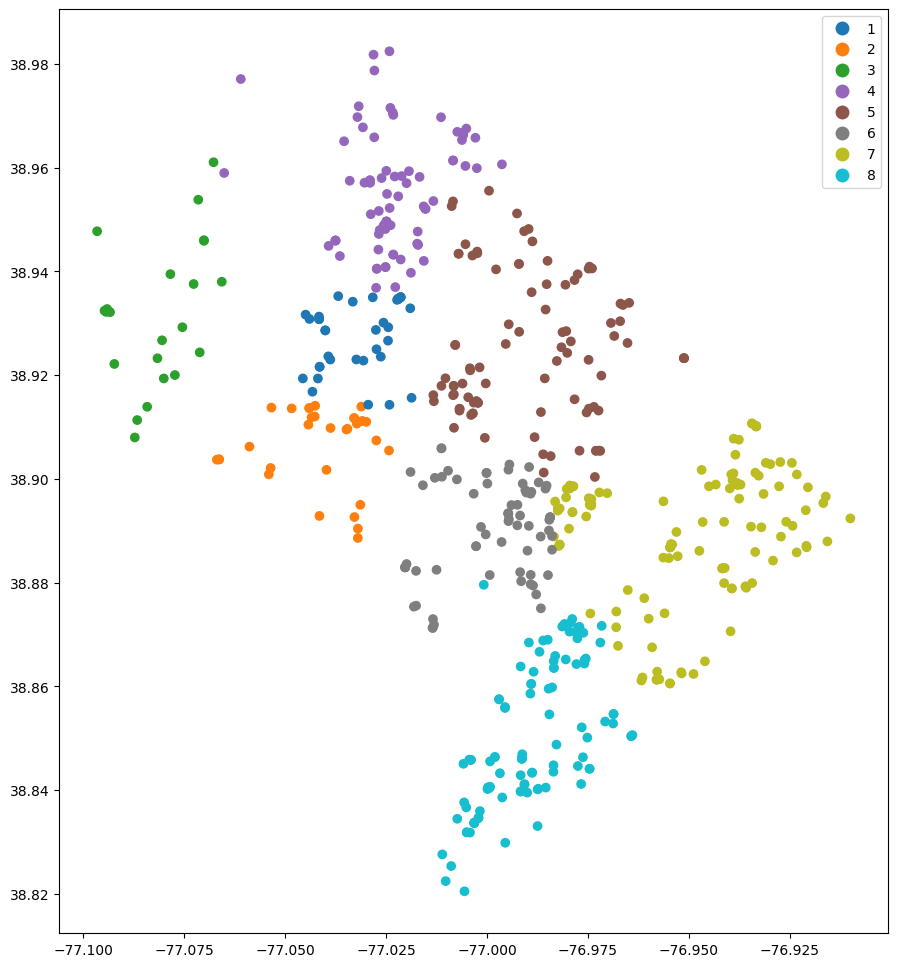

In [91]:
# abandonedGEO['geometry'].info() ====== Data type is geometry 
abandonedGEO = abandonedGEO[['SERVICECODE', 'SERVICECODEDESCRIPTION', 'ADDDATE', 'RESOLUTIONDATE',
                             'SERVICEDUEDATE', 'SERVICEORDERDATE', 'PRIORITY', 'STREETADDRESS', 'ZIPCODE', 'WARD', 'geometry']] #cleaned it according to the similar pandas before
abandonedGEO.head()
abandonedGEO = abandonedGEO.dropna()
abandonedGEO = abandonedGEO[abandonedGEO.WARD != 'Null']
abandonedGEO.plot(column = 'WARD', legend = True, figsize = (20,12))